In [7]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.linalg

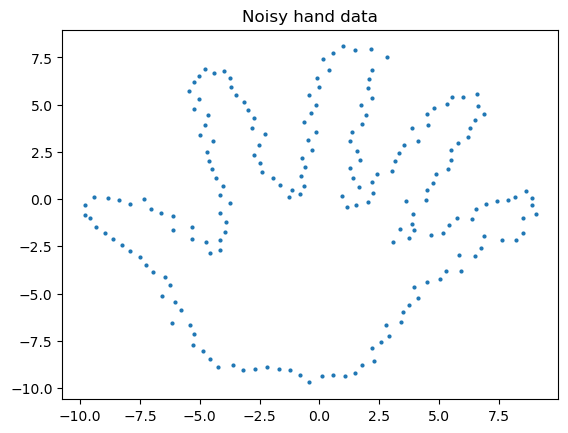

In [5]:
# Read the data
dir = 'data/curves'
hand = np.loadtxt(dir + '/hand_noisy.txt')

# Plot the data with smaller dots
plt.plot(hand[:,0], hand[:,1], 'o', markersize=2)
plt.title('Noisy hand data')
plt.show()

# Explicit smoothing

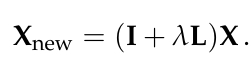

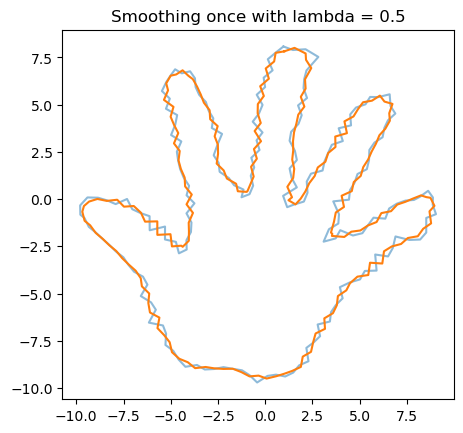

In [14]:
# Make the circulant smoothing matrix
l = np.zeros(hand.shape[0])
l[[-1, 0, 1]] = [1, -2, 1] # First columns of the matrix
L = scipy.linalg.circulant(l)

# Smoothing parameter
lmb = 0.5

# Apply the equation
hand_smooth = (np.eye(hand.shape[0]) + lmb * L) @ hand

# Plot the results - use indexing to plot closed curve
idx = np.arange(hand.shape[0] + 1)
idx[-1] = 0
fig, ax = plt.subplots()
ax.plot(hand[idx, 0], hand[idx, 1], alpha=0.5)
ax.plot(hand_smooth[idx, 0], hand_smooth[idx, 1])
ax.set_aspect('equal')
ax.set_title(f'Smoothing once with lambda = {lmb}')
plt.show()

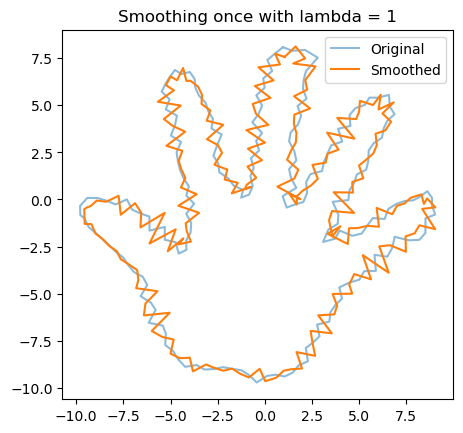

In [18]:
# Trying larger values of lambda
lmb = 1
hand_smooth = (np.eye(hand.shape[0]) + lmb * L) @ hand

# Plot the results - use indexing to plot closed curve
fig, ax = plt.subplots()
ax.plot(hand[idx, 0], hand[idx, 1], alpha=0.5, label='Original')
ax.plot(hand_smooth[idx, 0], hand_smooth[idx, 1], label='Smoothed')
ax.set_aspect('equal')
ax.set_title(f'Smoothing once with lambda = {lmb}')
ax.legend()
plt.show()

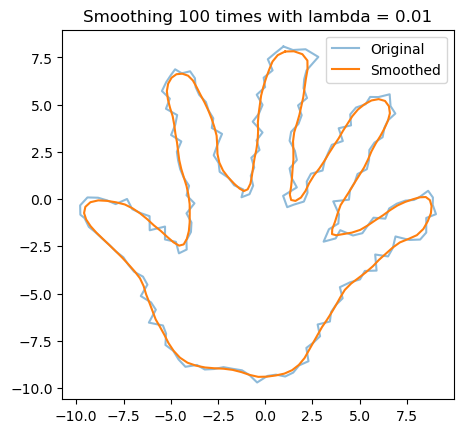

In [20]:
# It is better to smooth iteratively, with small values of lambda
lmb = 0.01
n_iter = 100

hand_smooth = hand

for i in range(n_iter):
    hand_smooth = (np.eye(hand.shape[0]) + lmb * L) @ hand_smooth

# Plot the results - use indexing to plot closed curve
fig, ax = plt.subplots()
ax.plot(hand[idx, 0], hand[idx, 1], alpha=0.5, label='Original')
ax.plot(hand_smooth[idx, 0], hand_smooth[idx, 1], label='Smoothed')
ax.set_aspect('equal')
ax.set_title(f'Smoothing {n_iter} times with lambda = {lmb}')
ax.legend()
plt.show()

# Implicit smoothing

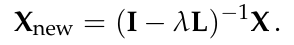

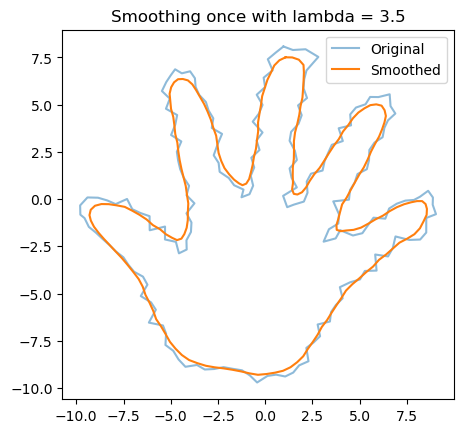

In [29]:
# With implicit smoothing, we can use larger values of lambda
lmb = 3.5

hand_smooth_implicit = np.linalg.inv(np.eye(hand.shape[0]) - lmb * L) @ hand

# Plot the results - use indexing to plot closed curve
fig, ax = plt.subplots()
ax.plot(hand[idx, 0], hand[idx, 1], alpha=0.5, label='Original')
ax.plot(hand_smooth_implicit[idx, 0], hand_smooth_implicit[idx, 1], label='Smoothed')
ax.set_aspect('equal')
ax.set_title(f'Smoothing once with lambda = {lmb}')
ax.legend()
plt.show()

# Extended kernel

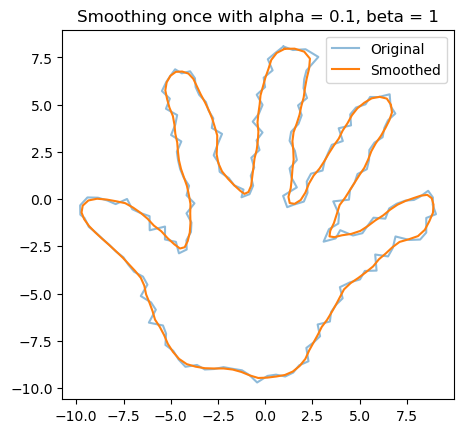

In [32]:
# Now with 2 kernels

# Circulant smoothing matrices
a = np.zeros(hand.shape[0]) # Array for first order derivative
a[[-1, 0, 1]] = [1, -2, 1]
A = scipy.linalg.circulant(a) # Circulant matrix for first order derivative
b = np.zeros(hand.shape[0]) # Array for second order derivative
b[[-2, -1, 0, 1, 2]] = [-1, 4, -6, 4, -1]
B = scipy.linalg.circulant(b) # Circulant matrix for second order derivative

# Smoothing parameters
alpha = 0.1
beta = 1

# Apply the equation
hand_smooth_extended = hand.copy()
hand_smooth_extended = np.linalg.inv(np.eye(hand.shape[0]) - alpha * A - beta * B) @ hand_smooth_extended

# Plot the results - use indexing to plot closed curve
fig, ax = plt.subplots()
ax.plot(hand[idx, 0], hand[idx, 1], alpha=0.5, label='Original')
ax.plot(hand_smooth_extended[idx, 0], hand_smooth_extended[idx, 1], label='Smoothed')
ax.set_aspect('equal')
ax.set_title(f'Smoothing once with alpha = {alpha}, beta = {beta}')
ax.legend()
plt.show()

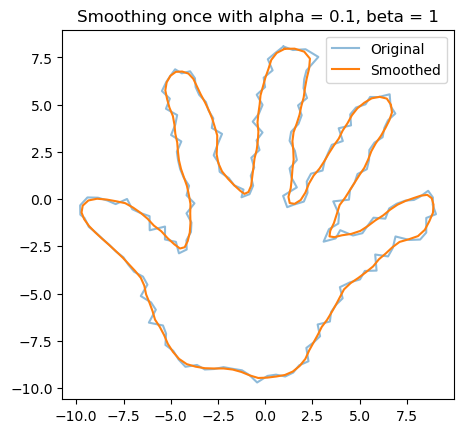

In [34]:
# Make a function for the smoothing. Input: data, alpha, beta. Output: smoothed data

def smooth(data, alpha, beta):
    a = np.zeros(data.shape[0]) # Array for first order derivative
    a[[-1, 0, 1]] = [1, -2, 1]
    A = scipy.linalg.circulant(a) # Circulant matrix for first order derivative
    b = np.zeros(data.shape[0]) # Array for second order derivative
    b[[-2, -1, 0, 1, 2]] = [-1, 4, -6, 4, -1]
    B = scipy.linalg.circulant(b) # Circulant matrix for second order derivative
    return np.linalg.inv(np.eye(data.shape[0]) - alpha * A - beta * B) @ data

# Test the function
hand_smooth_extended = smooth(hand, 0.1, 1)

# Plot the results - use indexing to plot closed curve
fig, ax = plt.subplots()
ax.plot(hand[idx, 0], hand[idx, 1], alpha=0.5, label='Original')
ax.plot(hand_smooth_extended[idx, 0], hand_smooth_extended[idx, 1], label='Smoothed')
ax.set_aspect('equal')
ax.set_title(f'Smoothing once with alpha = 0.1, beta = 1')
ax.legend()
plt.show()